<a href="https://colab.research.google.com/github/yucachen/MLTSA25_YChen/blob/main/HW2/HW2_FittingLineToGRBAfterglows_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group: Jacklyn Clauss, Yuca Chen, Skyler Lindsey, Dayanara Yanez

Division of work:

Task 1: Jacklyn Clauss

Task 2a: Yuca Chen

Task 2b: Dayanara Yanez

Task 2c, 2d, 3: Skyler Lindsey

# Fitting a line to GRB afterglow photometry

This exercise teaches you to fit the simplest model to data: a line, using different methods.

Notes:

  A GRB is a powerful cosmic stellar explosion. GRB stands for Gamma Ray Burst. While we see flux in Gamma Ray frequency (very high energy light which our eyes cannot see and does not go through the Earth's atmosphere) which characterize the explosion and gives it itsname, we also see visible light, generally called After Glow (AG)

  **In this exercise you will fit a line to the decreasing afterglow luminosity of a GRB**
    
  **TL;DR: we measure a quantity named magnitude over time, which relates to the brightness of the GRB, and which is expected to change it roughly linearly with the logarithm of time.**
    
  **Details**: *The light that we measure from these explosions changes over time, so we can study its time series. The change in light is exponential, not linear, but if we take the logarithm of the light, that chance may be linear, since the logarithm is the inverse of exponent. The logarithm of the light flux is called magnitude in astronomy. A line is a power law in log-log space. The GRB afterglow is generated by a powerlaw process.*
    

  *In reality, the correct model is a  broken powerlaw: the slope of the line "breaks" or changes, at some point in time. But this exercise is about fitting lines.*

# initial imports

In [ ]:
import pandas as pd
import pylab as pl
%pylab inline
#to section 2b
from sklearn.linear_model import LinearRegression
import matplotlib

# I have created a stylesheet to define default plot behaviors.
# This stylesheet changes the default parameters stored in the dictionary matplitlib.rcParams
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20


Populating the interactive namespace from numpy and matplotlib


# Task 1: Read and prepare the input dataset
I am reading the data with Pandas. Pandas has excellent utilities for input-output of tabular data and also for time variables. We will use it throughout as our main package to acquire and manipulate data

find the link to the *raw* input file on github in the HW1 folder https://github.com/fedhere/MLTSA_FBianco/tree/master/HW1

In [ ]:
grbAG = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv')
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


## Create the log-time variable

We will fit a line in log space. The magnitude column I gave you is the logarithm (base 10) of the flus so that is already available. Create a logarithm base 10 of the time variable

(Fitting a line in log-log space corresponds to fitting a powerlaw y=x^a in natural space. Note: we mean logbase 10, use ```numpy.log10()```)

If you have trouble with this look at this gist https://gist.github.com/fedhere/42956d318347def627f6ad750c3eee9a


In [ ]:
grbAG["logtime"] = np.log10(grbAG.loc[:,"time"])
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


## Visualize the data
The data are photometric measurements: measurement of flux from an exploding star. The flux is measured in different photometric bands, i.e. within different wavelength range. You can think about this as a filter that would limit the light collected by a camera to a single color, e.g. red, blue, or green. In most all cameras (your phone camera for example) collect data in RGB bands saparately and combine them to create a "color picture". Our eyes also perceive color in 3 bands, R, G, B.

The information about the photometric band is stored in the variable ```grbAG.filter```. If I wanted to retrieve all magnitudes for filter 'V' I would do ```grbAG.loc[grbAG["filter"] == f, "mag"]```.

Plot the data with different colors for different photometric bands.

Use pl.errorbar to display the uncertainties in the data - if you do not know how to use pl.errorbar you can symply type

```pl.errorbar?``` in a cell to retrieve the help

In [ ]:
pl.errorbar?

'\nNotes from Jacklyn (5/23/25)\n\nI am not sure why this warning is occuring. I tried to do some digging on how to\nfix it and was not able to find anything that helped. However, this does not effect\nthe outcome of the plot itself, so I have decided to let it be, rather than trying to\nfix it and potentially messing up the code that works.\n'

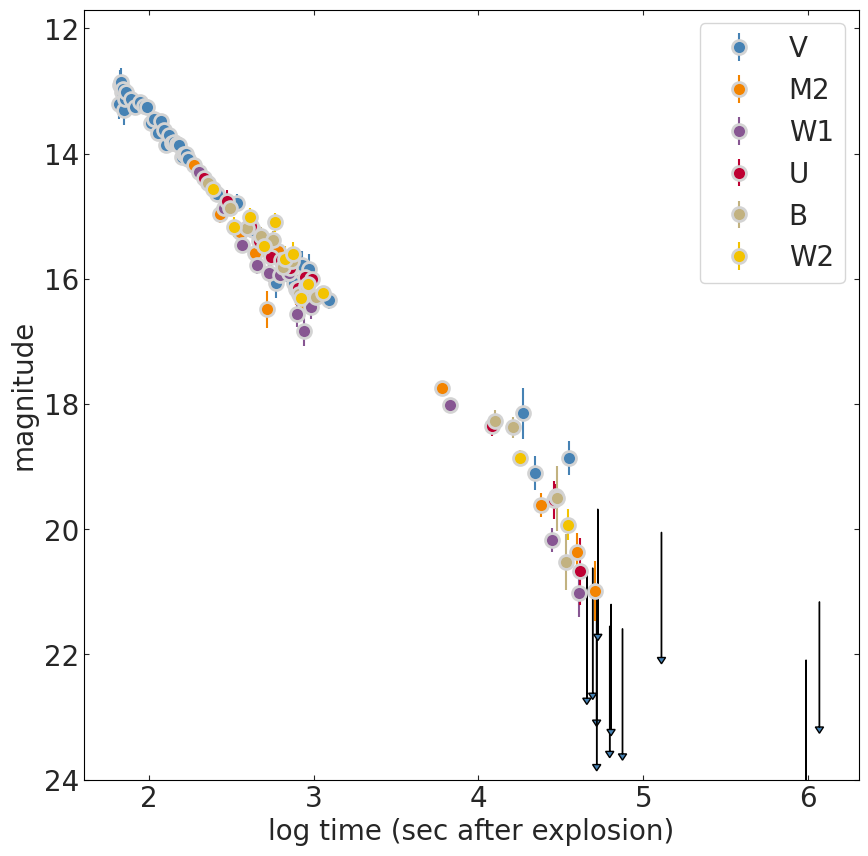

In [ ]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    # here we use pl.errorbar to plot the points.
    # on the x axis we plot the logtime, and on the y axis we plot magnitude
    # the magnitude error is also shown (as yerr)
    # we also set the label to the filter so that this will show in th legend
    # the last pieces of code have to do with setting the style of the plot
    pl.errorbar(x=grbAG.loc[grbAG["filter"] == f, "logtime"],
                y=grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                label = f,linestyle=' ', marker ='o',mec = '#d3d3d3',ms=10,mew = 2)


# plot the upperlimits as arrows
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);

"""
Notes from Jacklyn (5/23/25)

I am not sure why this warning is occuring. I tried to do some digging on how to
fix it and was not able to find anything that helped. However, this does not effect
the outcome of the plot itself, so I have decided to let it be, rather than trying to
fix it and potentially messing up the code that works.
"""


Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.

## Clean the data: Remove upper limits
This data includes upper limits which I plotted as downward errors. upper and lower limits (technically called "censored data" are extremely hard to deal with in modeling). For now, lets just remove them.

To remove the upper limits you can "broadcast" the data: in pandas that looks like

```grbAG.loc[grbAG.upperlimit == 0]```

If you do not know how to remove selected rows from a dataframe based on a condition look at this gist https://gist.github.com/fedhere/e9cd67d9dc0357ee547e03a12ceb4719

The information about whether the point is an upper limit or a measurement is stored in the variable ```grbAG.upperlimit```.


In [ ]:
# create a new data frame where the upper limits are removed.
grbAG_noup = grbAG.loc[grbAG.upperlimit == 0]
grbAG_noup.tail()

,filter,time,mag,magerr,upperlimit,logtime
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207
109,M2,51257,20.989034,0.48,0,4.709753


# Task 2: Fit models to data
## Task 2a: Solve using the Normal Equation

You can use the code I put in the slides for this - you can copy and paste it but you will learn most if you try type it down and make sure you understand it line by line!!

It can be shown that the best linear fit to data is given by the equation:  

$(X^T \cdot X)^{-1} \cdot X^T \cdot \vec{y}$

The solution is a tuple of 2 parameters: sloper and intercept. Therefore the input has to be Nx2


In [ ]:
# grbAG = grbAG_noup


In [ ]:
x = np.log10(grbAG_noup.loc[:,'time']) # what is your exogenous variable?
print(x)
x.shape

0      1.819544
1      1.826075
2      1.832509
3      1.838849
4      1.845098
         ...   
103    4.551913
104    4.598604
105    4.608366
106    4.613207
109    4.709753
Name: time, Length: 108, dtype: float64


(108,)

In [ ]:
# to solve w linear algebra or sklearn I need the exogenous variable to be 2xN

X = np.c_[np.ones((len(grbAG) - grbAG.upperlimit.sum(), 1)),
          x]
X.shape

(108, 2)

In [ ]:
xInput = np.transpose(X)
y = grbAG_noup.mag

# print("shape of the input array X", X.shape)
print("shape of the input array X", xInput.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (2, 108)
shape of the input array y (108,)


In [ ]:
#see slides - the solution is there!

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print ("best fit parameters from the Normal Equation: " +
       "intercept {:.2f}, slope {:.2f}".format(*theta_best))
print(theta_best)

"""
thoughts from Yuca 5:40 PM, 2/23/2025:
these values should be not egrigeous ?
I was looking at the plot Jacklyn made above,
and the values aren't clearly outside of where the plot implies them to be
(keeping in mind that the plot above as an "inverted" y-axis,
where it's plotting the bigger magnitude starting from the "bottom")
"""

best fit parameters from the Normal Equation: intercept 8.58, slope 2.51
[8.58266823 2.51199984]


'\nthoughts from Yuca 5:40 PM, 2/23/2025:\nthese values should be not egrigeous ?\nI was looking at the plot Jacklyn made above,\nand the values aren\'t clearly outside of where the plot implies them to be\n(keeping in mind that the plot above as an "inverted" y-axis,\nwhere it\'s plotting the bigger magnitude starting from the "bottom")\n'

## Task 2b: Fit a line to the data with sklearn LinearRegression

The exogenous (independent) variable is ```grbAG.logtime```.





In [ ]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
#from sklearn.linear_model import LinearRegression  --> already imported in the top cell.

#sklearn is an object oriented package. You will call the function which will create a model (model selection) then fit it to the data separately (model fitting)
#Here we are fitting the line nad excluding the upper limits

x = grbAG.loc[grbAG.upperlimit == 0, 'logtime'].values
X = np.c_[np.ones((x.shape[0], 1)), x]
y = grbAG.loc[grbAG.upperlimit == 0, 'mag'].values


lr = LinearRegression()
lr.fit(X, y)


theta = (lr.intercept_, lr.coef_[1])

#print ("best fit parameters from the sklearn LinearRegression(): " +
 #      "intercept {:.2f}, slope {:.2f}".format(*theta))


#this will create new properties of the model instance: the intercept and coefficients!

print ("best fit parameters from the sklearn LinearRegression(): " +
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


## Optional Task 2c: Fit a line to the data (excluding the upper limits) by minimizing an objective function

First, choose the L1 metric (see class notes) as the objective function.

Use ```scipy.optimize.minimize()``` to minimize it.


In [ ]:
#note: imports should be moved to the top cell - follow PEP8 guidelines

def line(x, intercept, slope):
    '''
    x - point to evaluate the line at
    intercept - the y intercept of the line
    slope - the slope of the line
    '''
    y=slope*x+intercept
    return y

def l1(args, x, y):
    '''
    This function simply defines the L1 loss function
    x,y - Point to find the "loss" of
    args - information about the line (intercept and slope)
    '''
    loss=y-line(x, *args)
    return np.sum(np.abs(loss))



initialGuess = (10, 1) #this can be important, a bad choice can get us stuck in a local minimum. But for this simple problem we can just guess whaetever

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.303317772383874
        x: [ 8.225e+00  2.641e+00]
      nit: 17
      jac: [-1.359e-01 -2.094e+00]
 hess_inv: [[ 1.935e-04 -4.675e-05]
            [-4.675e-05  1.132e-05]]
     nfev: 391
     njev: 125

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64



## Optional task 2d: Fit a line to the data (excluding the upper limits) by minimizing an objective function that accounts for the measurements uncertainties

Since the data has uncertainty, choose the Pearson's $\chi^2$ (chi squared) function as your objective function. The $\chi^2$ is the distance between prediction and truth, divided by the uncertainty (sigma squares) see slides or see slides or https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#:~:text=10%20References-,Definition,differs%20from%20a%20theoretical%20distribution.

In [ ]:
def chi2(args, x, y, s):
    '''
    args - information about the line (intercept and slope)
    x,y - Point to find the "loss" of
    s - the uncertainty of the data point (x,y)
    '''
    a, b = args
    return sum((y - line(a, b, x))**2) #see notes
# assign the uncertainties to s. Its the column names "magerr"

s=grbAG['magerr']

initialGuess = (10, 1)

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))

print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " +
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.825987500725534
        x: [ 2.512e+00  8.583e+00]
      nit: 5
      jac: [-7.153e-07  1.192e-07]
 hess_inv: [[ 7.114e-03 -2.030e-02]
            [-2.030e-02  6.254e-02]]
     nfev: 21
     njev: 7

best fit parameters from the minimization of the chi squared: slope 2.51, intercept 8.58


# Task 3: Plot all the solutions

To do this best, you can create a function that uses the parameters you input and plots a line. Add a legend that describes which line corresponds to what.

If you do not know how to define a function look here. https://gist.github.com/fedhere/babc8d20533acb9288caf097138825bc


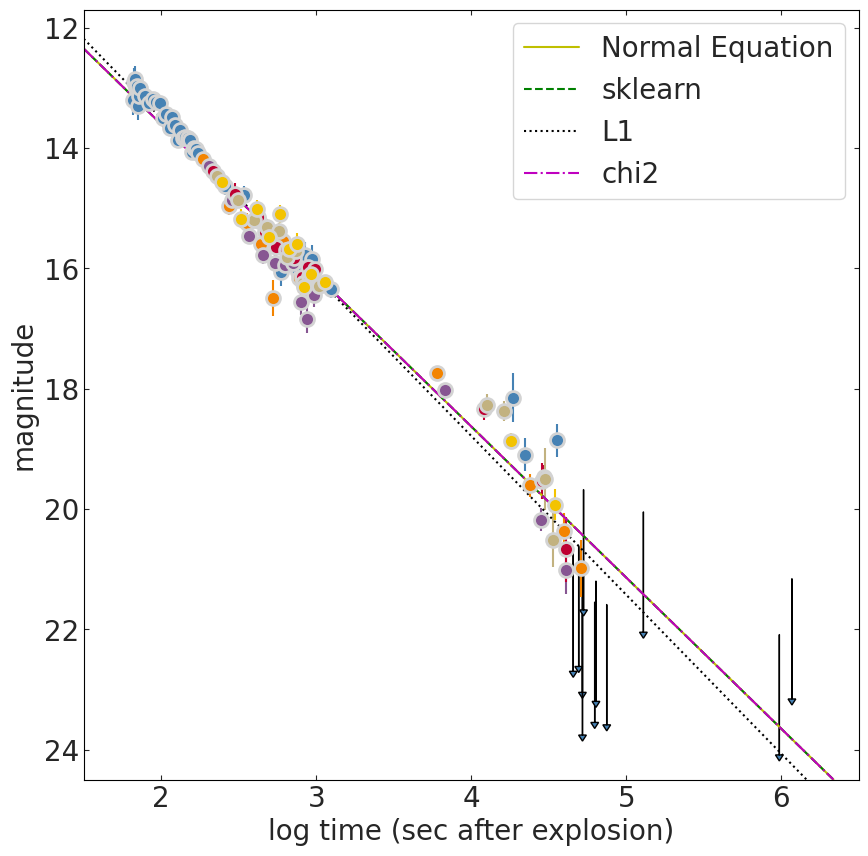

In [ ]:
def plotline(b,m,Label,Color,Linestyle):
    ax.axline((0,b),slope=m,label=Label,color=Color,linestyle=Linestyle)



ax = pl.figure(figsize=(10,10)).add_subplot(111)

# plot the datapoints as above as errorbars
for f in grbAG["filter"].unique():
    pl.errorbar(x=grbAG.loc[grbAG["filter"] == f, "logtime"],
                y=grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                linestyle=' ', marker ='o',mec = '#d3d3d3',ms=10,mew = 2)
# plot the upperlimits as arrows (see above)
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

#plot the models

#normal equation
plotline(theta_best[0],theta_best[1],'Normal Equation','y','-')


#sklearn
plotline(theta[0],theta[1],'sklearn','g','--')

#minimize L1
plotline(l1Solution.x[0],l1Solution.x[1],'L1','k',':')

#minimize chi2
plotline(chi2Solution.x[1],chi2Solution.x[0],'chi2','m','-.')

pl.ylim(24,11.7)
pl.xlim(1.5, 6.5)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20);

Figure 2: This plot is the same as figure 1, with the addition of plotting four lines fit to the photometry data. One was fit using the Normal equation (shown as a solid yellow line). Another was fit using sklearn (shown as a green dashed line). A third was fit by minimizing the L1 objective function (shown as the dotted black line). The fourth fit was made by minimizing the $\chi^2$ objective function (shown as the dashed-dotted magenta line). It is important to note that the normal equation, sklearn, and the $\chi^2$ objective function appear to be directly on top of each other, showing that these fitting methods have produced the same results. The fit line using the L1 objective function is slightly skewed from the other fit lines, where prioritization of fitting seems to be given to points at earlier times versus those at later times.